<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/CYBERSECURITY_AGENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_google_genai langchain_core langgraph

In [3]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key = GEMINI_API_KEY)
llm.invoke("im naveed")

AIMessage(content="It's nice to meet you, Naveed.  How can I help you today?\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-c1e231e0-877e-48e7-88f6-3752574589c2-0', usage_metadata={'input_tokens': 4, 'output_tokens': 20, 'total_tokens': 24, 'input_token_details': {'cache_read': 0}})

In [4]:
from google.colab import userdata
LANGCHAIN_API_KEY = userdata.get('langchain')

In [7]:


# Tool: Log Analysis
def analyze_logs(logs: str) -> str:
    """Analyze logs for suspicious activities.

    Args:
        logs: String containing log data.
    """
    return f"Analyzed logs: Found anomalies in {logs}"

# Tool: Threat Intelligence
def fetch_threat_intelligence(ip: str) -> str:
    """Fetch threat intelligence for a given IP address.

    Args:
        ip: Target IP address.
    """
    return f"Threat intelligence for IP {ip}: No malicious activity detected."

# Tool: Vulnerability Scanning
def scan_vulnerabilities(target: str) -> str:
    """Scan a target system for vulnerabilities.

    Args:
        target: System to scan.
    """
    return f"Scanned {target}: Found 3 critical vulnerabilities."
tools = [analyze_logs, fetch_threat_intelligence, scan_vulnerabilities]
llm_with_tools = llm.bind_tools(tools)



In [8]:
llm_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x79aa28e265c0>, default_metadata=()), kwargs={'tools': [{'type': 'function', 'function': {'name': 'analyze_logs', 'description': 'Analyze logs for suspicious activities.', 'parameters': {'properties': {'logs': {'description': 'String containing log data.', 'type': 'string'}}, 'required': ['logs'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'fetch_threat_intelligence', 'description': 'Fetch threat intelligence for a given IP address.', 'parameters': {'properties': {'ip': {'description': 'Target IP address.', 'type': 'string'}}, 'required': ['ip'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'scan_vulnerabilities', 'description': 'Scan a target system for vulnerabilities.', 'parameters': {'properties': {'target': {'descri

In [9]:
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph
from langgraph.checkpoint.memory import MemorySaver
memory: MemorySaver = MemorySaver()

In [10]:
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# Node
def assistant(state: MessagesState) -> MessagesState:
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

In [11]:
# Graph
builder: StateGraph = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",

    tools_condition,
)
builder.add_edge("tools", "assistant")
graph = builder.compile(checkpointer=memory)

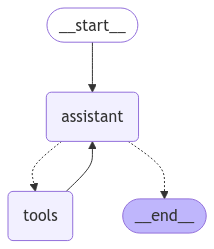

In [12]:
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [18]:
from langchain.schema.messages import HumanMessage , AIMessage , ToolMessage

In [19]:
config1 = {"configurable": {"thread_id": "1"}}

In [20]:
messages = graph.invoke({"messages": [HumanMessage(content="what is cybersecurity?")]},config1)
for m in messages['messages']:
    m.pretty_print()


================================ Human Message =================================

what is cybersecurity?
================================== Ai Message ==================================

Cybersecurity is the process of preventing theft, damage, and unwanted access to computer systems, networks, and digital data.  It involves a wide range of technologies, processes, and practices designed to protect information and systems from various threats.


In [21]:
messages = graph.invoke({"messages": [HumanMessage(content="What is the threat level of IP 192.168.1.1?")]},config1)
for m in messages['messages']:
    m.pretty_print()


================================ Human Message =================================

what is cybersecurity?
================================== Ai Message ==================================

Cybersecurity is the process of preventing theft, damage, and unwanted access to computer systems, networks, and digital data.  It involves a wide range of technologies, processes, and practices designed to protect information and systems from various threats.
================================ Human Message =================================

What is the threat level of IP 192.168.1.1?
================================== Ai Message ==================================
Tool Calls:
  fetch_threat_intelligence (28a1a37d-c8b7-41a4-9a45-661545fdcd6a)
 Call ID: 28a1a37d-c8b7-41a4-9a45-661545fdcd6a
  Args:
    ip: 192.168.1.1
================================= Tool Message =================================
Name: fetch_threat_intelligence

Threat intelligence for IP 192.168.1.1: No malicious activity detected.
=====

In [23]:
messages = graph.invoke({"messages": [HumanMessage(content="Scan the server example.com for vulnerabilities.?")]},config1)
for m in messages['messages']:
    m.pretty_print()


================================ Human Message =================================

what is cybersecurity?
================================== Ai Message ==================================

Cybersecurity is the process of preventing theft, damage, and unwanted access to computer systems, networks, and digital data.  It involves a wide range of technologies, processes, and practices designed to protect information and systems from various threats.
================================ Human Message =================================

What is the threat level of IP 192.168.1.1?
================================== Ai Message ==================================
Tool Calls:
  fetch_threat_intelligence (28a1a37d-c8b7-41a4-9a45-661545fdcd6a)
 Call ID: 28a1a37d-c8b7-41a4-9a45-661545fdcd6a
  Args:
    ip: 192.168.1.1
================================= Tool Message =================================
Name: fetch_threat_intelligence

Threat intelligence for IP 192.168.1.1: No malicious activity detected.
=====

In [24]:
messages = graph.invoke({"messages": [HumanMessage(content="List all critical vulnerabilities detected on 192.168.1.10.?")]},config1)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is cybersecurity?
================================== Ai Message ==================================

Cybersecurity is the process of preventing theft, damage, and unwanted access to computer systems, networks, and digital data.  It involves a wide range of technologies, processes, and practices designed to protect information and systems from various threats.
================================ Human Message =================================

What is the threat level of IP 192.168.1.1?
================================== Ai Message ==================================
Tool Calls:
  fetch_threat_intelligence (28a1a37d-c8b7-41a4-9a45-661545fdcd6a)
 Call ID: 28a1a37d-c8b7-41a4-9a45-661545fdcd6a
  Args:
    ip: 192.168.1.1
================================= Tool Message =================================
Name: fetch_threat_intelligence

Threat intelligence for IP 192.168.1.1: No malicious activity detected.
=====

In [25]:
messages = graph.invoke({"messages": [HumanMessage(content="Check if the system complies with OWASP Top 10.")]},config1)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is cybersecurity?
================================== Ai Message ==================================

Cybersecurity is the process of preventing theft, damage, and unwanted access to computer systems, networks, and digital data.  It involves a wide range of technologies, processes, and practices designed to protect information and systems from various threats.
================================ Human Message =================================

What is the threat level of IP 192.168.1.1?
================================== Ai Message ==================================
Tool Calls:
  fetch_threat_intelligence (28a1a37d-c8b7-41a4-9a45-661545fdcd6a)
 Call ID: 28a1a37d-c8b7-41a4-9a45-661545fdcd6a
  Args:
    ip: 192.168.1.1
================================= Tool Message =================================
Name: fetch_threat_intelligence

Threat intelligence for IP 192.168.1.1: No malicious activity detected.
=====

In [26]:
messages = graph.invoke({"messages": [HumanMessage(content="Suggest response steps for a DDoS attack detected on the server.")]},config1)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is cybersecurity?
================================== Ai Message ==================================

Cybersecurity is the process of preventing theft, damage, and unwanted access to computer systems, networks, and digital data.  It involves a wide range of technologies, processes, and practices designed to protect information and systems from various threats.
================================ Human Message =================================

What is the threat level of IP 192.168.1.1?
================================== Ai Message ==================================
Tool Calls:
  fetch_threat_intelligence (28a1a37d-c8b7-41a4-9a45-661545fdcd6a)
 Call ID: 28a1a37d-c8b7-41a4-9a45-661545fdcd6a
  Args:
    ip: 192.168.1.1
================================= Tool Message =================================
Name: fetch_threat_intelligence

Threat intelligence for IP 192.168.1.1: No malicious activity detected.
=====

In [27]:
messages = graph.invoke({"messages": [HumanMessage(content="Create an incident report for unauthorized access on 2024-12-01.")]},config1)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is cybersecurity?
================================== Ai Message ==================================

Cybersecurity is the process of preventing theft, damage, and unwanted access to computer systems, networks, and digital data.  It involves a wide range of technologies, processes, and practices designed to protect information and systems from various threats.
================================ Human Message =================================

What is the threat level of IP 192.168.1.1?
================================== Ai Message ==================================
Tool Calls:
  fetch_threat_intelligence (28a1a37d-c8b7-41a4-9a45-661545fdcd6a)
 Call ID: 28a1a37d-c8b7-41a4-9a45-661545fdcd6a
  Args:
    ip: 192.168.1.1
================================= Tool Message =================================
Name: fetch_threat_intelligence

Threat intelligence for IP 192.168.1.1: No malicious activity detected.
=====

In [28]:
messages = graph.invoke({"messages": [HumanMessage(content="How to remediate the vulnerability CVE-2024-1234?")]},config1)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is cybersecurity?
================================== Ai Message ==================================

Cybersecurity is the process of preventing theft, damage, and unwanted access to computer systems, networks, and digital data.  It involves a wide range of technologies, processes, and practices designed to protect information and systems from various threats.
================================ Human Message =================================

What is the threat level of IP 192.168.1.1?
================================== Ai Message ==================================
Tool Calls:
  fetch_threat_intelligence (28a1a37d-c8b7-41a4-9a45-661545fdcd6a)
 Call ID: 28a1a37d-c8b7-41a4-9a45-661545fdcd6a
  Args:
    ip: 192.168.1.1
================================= Tool Message =================================
Name: fetch_threat_intelligence

Threat intelligence for IP 192.168.1.1: No malicious activity detected.
=====